In [1]:
import pandas as pd
import numpy as np
import os

In [3]:
os.getcwd()

'/Users/zhongwen/Documents/jupyter-test copy'

In [5]:
df = pd.DataFrame(data=np.array([[1,2,3],[4,5,6]], dtype=int),columns=['A','B','C'])
df

,A,B,C
0,1,2,3
1,4,5,6


In [4]:
import matplotlib
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [9]:
x = np.linspace(0,5,10)
y = x**3

In [10]:
from pylab import *

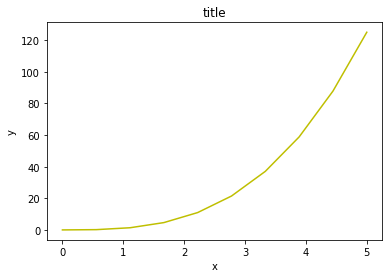

In [12]:
figure()
plot(x,y,'y')
xlabel('x')
ylabel('y')
title('title')
show()

In [28]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%pyth

In [29]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [30]:
single_instance_str = "yellow,white,red,gray"
single_instance_list = single_instance_str.split(',')
print(single_instance_list)

['yellow', 'white', 'red', 'gray']


In [31]:
print(single_instance_str)
print(single_instance_str[2])
print(single_instance_list)
print(single_instance_list[2])

yellow,white,red,gray
l
['yellow', 'white', 'red', 'gray']
red


In [32]:
print(single_instance_list)
print(single_instance_list[-1])
print(single_instance_list[-2])

['yellow', 'white', 'red', 'gray']
gray
red


In [33]:
name = "5,4,8,6,2,9,0,1"
list_1 = name.split(',')
print('name=',name, 'list=',list_1)

name= 5,4,8,6,2,9,0,1 list= ['5', '4', '8', '6', '2', '9', '0', '1']


In [34]:
list_1.sort()
list_1

['0', '1', '2', '4', '5', '6', '8', '9']

In [35]:
list_1

['0', '1', '2', '4', '5', '6', '8', '9']

In [36]:
list_1.reverse()
list_1

['9', '8', '6', '5', '4', '2', '1', '0']

In [40]:
list_1.append('7')

In [41]:
list_2 = list_1

In [42]:
print (list_2)

['9', '8', '6', '5', '4', '2', '1', '0', '7', '7']


In [6]:
dir(list)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [7]:
dict(str)

TypeError: 'type' object is not iterable

In [8]:
numbers = dict(x=5, y=0)
print('numbers = ',numbers)
print(type(numbers))

empty = dict()
print('empty = ',empty)
print(type(empty))

numbers =  {'x': 5, 'y': 0}
<class 'dict'>
empty =  {}
<class 'dict'>


In [9]:
import pandas as pd
d = {'x1':[1,2,3],'y1':[4,5,6]}
pd1 = pd.DataFrame(data=d)
print(pd1)

   x1  y1
0   1   4
1   2   5
2   3   6


In [10]:
pd1 +=5
print(pd1)

   x1  y1
0   6   9
1   7  10
2   8  11


In [11]:
df.dtypes

A    int64
B    int64
C    int64
dtype: object

In [12]:
pd2 = pd1.T
print(pd1.T)

    0   1   2
x1  6   7   8
y1  9  10  11


In [13]:
pd2 -=5

In [14]:
pd2


,0,1,2
x1,1,2,3
y1,4,5,6


In [15]:
pd1

,x1,y1
0,6,9
1,7,10
2,8,11


In [16]:
pd1

,x1,y1
0,6,9
1,7,10
2,8,11


In [17]:
print(pd1)

   x1  y1
0   6   9
1   7  10
2   8  11


In [18]:
pd1.loc[1].at['y1']

10

In [19]:
pd1.axes

[RangeIndex(start=0, stop=3, step=1), Index(['x1', 'y1'], dtype='object')]

In [20]:
pd3 = pd.DataFrame(data={'m':[1,2],'n':[3,4],'k':[5,6]})
print(pd3)
pd3.axes

   m  n  k
0  1  3  5
1  2  4  6


[RangeIndex(start=0, stop=2, step=1), Index(['m', 'n', 'k'], dtype='object')]

In [21]:
pd3.columns

Index(['m', 'n', 'k'], dtype='object')

In [22]:
pd3.index('m')


TypeError: 'RangeIndex' object is not callable

In [23]:
import numpy as np
import pandas as pd

s = pd.Series([1,2,3,np.nan,4,5,6])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
5    5.0
6    6.0
dtype: float64

In [24]:
dates = pd.date_range('2019-01-01',periods=6)
print(dates)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')


In [25]:
df = pd.DataFrame(data=np.random.randn(6,5),index=dates,columns=list('ABCDE'))
df

,A,B,C,D,E
2019-01-01,0.311872,1.073570,0.152922,-0.922180,0.144063
2019-01-02,-0.199640,0.425137,1.095337,-0.550702,0.627226
2019-01-03,-0.413709,0.748343,-0.102069,0.415259,-1.898575
2019-01-04,0.385890,-0.173738,-0.914854,0.193192,1.185781
2019-01-05,-1.566865,0.997040,-0.432706,-1.177076,-1.664432
2019-01-06,-0.818777,0.257455,0.534149,0.324797,-0.828797


In [26]:
df = pd.DataFrame(data=np.random.randn(4,3),index=[1,2,3,4],columns=list('ABC'))
df

,A,B,C
1,-0.157803,-0.085244,0.999409
2,-0.049590,0.994627,2.500276
3,1.015100,0.075707,-0.587653
4,-0.132468,-0.783599,0.081385


In [27]:
df2 = pd.DataFrame({'A': [1,2,3,4],
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3]*4 , dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo',
                    'name': [2,4,np.nan,6]})
df2

,A,B,C,D,E,F,name
0,1,2013-01-02,1.0,3,test,foo,2.0
1,2,2013-01-02,1.0,3,train,foo,4.0
2,3,2013-01-02,1.0,3,test,foo,NaN
3,4,2013-01-02,1.0,3,train,foo,6.0


In [28]:
df2.dtypes


A                int64
B       datetime64[ns]
C              float32
D                int32
E             category
F               object
name           float64
dtype: object

In [29]:
import numpy as np
import pandas as pd

data = np.zeros((2, ), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])
pd.DataFrame(data)

,A,B,C
0,0,0.0,b''
1,0,0.0,b''


In [30]:
data[:] = [(1,2,'hello'),(3,4,'world')]

In [31]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'hello'
1,3,4.0,b'world'


In [32]:
data2 = data.copy()

In [36]:
data2

array([(1, 2., b'hello'), (3, 4., b'world')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [18]:
data = np.ones((3,4))
data

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [38]:
data = np.zeros((2,10))
data

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [39]:
data2 = np.zeros((2,3,2),dtype=np.int16)
data2

array([[[0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0]]], dtype=int16)

In [40]:
data3 = np.ones((2,1,1),dtype=np.int16)
data3

array([[[1]],

       [[1]]], dtype=int16)

In [41]:
data1 = np.random.random((2,1,2))
data1

array([[[0.75524545, 0.87721927]],

       [[0.46259145, 0.61026269]]])

In [42]:
data5 = np.full((3,2,3),17)
data5

array([[[17, 17, 17],
        [17, 17, 17]],

       [[17, 17, 17],
        [17, 17, 17]],

       [[17, 17, 17],
        [17, 17, 17]]])

In [43]:
dt0 = np.arange(10,26,5)
dt0

array([10, 15, 20, 25])

In [44]:
x=1
print(x)

1


In [45]:
import pandas as pd
from matplotlib import pyplot as plt

In [46]:
data = pd.read_csv("countries.csv")

In [47]:
data

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [48]:
data1 = data[data.country =='United States']
data1

,country,year,population
1608,United States,1952,157553000
1609,United States,1957,171984000
1610,United States,1962,186538000
1611,United States,1967,198712000
1612,United States,1972,209896000
1613,United States,1977,220239000
1614,United States,1982,232187835
1615,United States,1987,242803533
1616,United States,1992,256894189
1617,United States,1997,272911760


In [49]:
data2 = data[data.country=="China"]
data2

,country,year,population
288,China,1952,556263527
289,China,1957,637408000
290,China,1962,665770000
291,China,1967,754550000
292,China,1972,862030000
293,China,1977,943455000
294,China,1982,1000281000
295,China,1987,1084035000
296,China,1992,1164970000
297,China,1997,1230075000


In [ ]:
plt.plot(data1.year,data1.population/10**6)
plt.plot(data2.year,data2.population/10**6)
plt.title("population growth")
plt.xlabel("year")
plt.ylabel("population")
plt.legend(['US','China'])
plt.show()

In [1]:
a = 1
print (a)

a = 1
print (a)

1


In [51]:
data1.to_csv("China_csv")

In [52]:
data2.to_csv("China2_csv")

In [53]:
data


,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [54]:
data1.to_csv("test-out")

In [55]:
import pandas as pd
from matplotlib import pyplot as plt

In [56]:
data = pd.read_csv("China_csv")

In [57]:
data

,Unnamed: 0,country,year,population
0,1608,United States,1952,157553000
1,1609,United States,1957,171984000
2,1610,United States,1962,186538000
3,1611,United States,1967,198712000
4,1612,United States,1972,209896000
5,1613,United States,1977,220239000
6,1614,United States,1982,232187835
7,1615,United States,1987,242803533
8,1616,United States,1992,256894189
9,1617,United States,1997,272911760


In [58]:
data.country


0     United States
1     United States
2     United States
3     United States
4     United States
5     United States
6     United States
7     United States
8     United States
9     United States
10    United States
11    United States
Name: country, dtype: object

In [59]:
data = data[data.country=="United States"]

In [60]:
data[data.index==1]

,Unnamed: 0,country,year,population
1,1609,United States,1957,171984000


In [61]:
data.population


0     157553000
1     171984000
2     186538000
3     198712000
4     209896000
5     220239000
6     232187835
7     242803533
8     256894189
9     272911760
10    287675526
11    301139947
Name: population, dtype: int64

In [68]:
data.population.mean()
data.std()
data.mean()
data.max()
data.min()

Unnamed: 0             1608
country       United States
year                   1952
population        157553000
dtype: object

In [69]:
data.population.sum()

2738534790

In [70]:
data.sum()


Unnamed: 0                                                19362
country       United StatesUnited StatesUnited StatesUnited ...
year                                                      23754
population                                           2738534790
dtype: object

In [74]:
data.iloc[2,2]

1962

In [ ]:

a = 1



In [ ]:

a = 1



In [8]:
# -*- coding: utf-8 -*-
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

print("aaaaaaaaa", a)
print("xxxxx",x)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

aaaaaaaaa -0.21309983197231408
xxxxx [-3.14159265 -3.13844949 -3.13530633 ...  3.13530633  3.13844949
  3.14159265]
99 818.1250342129134
199 543.9698266814995
299 362.6871622092186
399 242.81389891256248
499 163.54763648195546
599 111.13277608505021
699 76.47342030377504
799 53.55490188436656
899 38.40001874145762
999 28.37884377130942
1099 21.75233620510437
1199 17.370554361218566
1299 14.47309865895667
1399 12.55715444980617
1499 11.290235265810578
1599 10.452484243748707
1699 9.898520909593431
1799 9.532212343384675
1899 9.28999059787963
1999 9.129821332295556
Result: y = 7.343553143321473e-06 + 0.8395523430892139 x + -1.2668851144727626e-06 x^2 + -0.09088547459656844 x^3


In [3]:
# -*- coding: utf-8 -*-

import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

ModuleNotFoundError: No module named 'torch'